In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, f1_score

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [4]:
os.chdir('/Users/Weiyang/Desktop/Git/Assignment/Assignment2/Data')

In [5]:
dataset = pd.read_csv('student-mat.csv', delimiter = ';')

### Inspecting Data

In [6]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [203]:
dataset.shape

(395, 33)

##### Comments:

##### 1) Since there are no unique IDs to identify students, each row shall be assumed as an individual (i.e. 395 students)

##### 2) There are no null values in the dataset

In [7]:
def unique_counts(dataset):
    for i in dataset.columns:
        count = dataset[i].nunique()
        print('There are {} unique values in {}.'.format(count, i))

In [8]:
unique_counts(dataset)

There are 2 unique values in school.
There are 2 unique values in sex.
There are 8 unique values in age.
There are 2 unique values in address.
There are 2 unique values in famsize.
There are 2 unique values in Pstatus.
There are 5 unique values in Medu.
There are 5 unique values in Fedu.
There are 5 unique values in Mjob.
There are 5 unique values in Fjob.
There are 4 unique values in reason.
There are 3 unique values in guardian.
There are 4 unique values in traveltime.
There are 4 unique values in studytime.
There are 4 unique values in failures.
There are 2 unique values in schoolsup.
There are 2 unique values in famsup.
There are 2 unique values in paid.
There are 2 unique values in activities.
There are 2 unique values in nursery.
There are 2 unique values in higher.
There are 2 unique values in internet.
There are 2 unique values in romantic.
There are 5 unique values in famrel.
There are 5 unique values in freetime.
There are 5 unique values in goout.
There are 5 unique values i

In [9]:
binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [10]:
numeric_variables = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'goout', 'health', 'absences']

In [11]:
categorical_variables = ['Fjob', 'Mjob', 'reason', 'guardian']

### Copy Dataset out

In [12]:
sample_dataset = dataset.copy()
sample_dataset1 = dataset.copy()

### Data Pre-processing

In [13]:
not_interested = ['G1', 'G2', 'G3']

In [14]:
interested = [col for col in dataset.columns if col not in not_interested]

In [15]:
new_dataset = dataset[interested]

In [16]:
y_values = dataset['G3']

### Label Encoding

In [17]:
from collections import defaultdict
d1 = defaultdict(LabelEncoder)
d2 = defaultdict(LabelEncoder)

In [18]:
bin_values = new_dataset[binary_variables]

In [19]:
cat_values = new_dataset[categorical_variables]

In [20]:
new_cat_values = pd.get_dummies(cat_values)

In [21]:
num_values = new_dataset[numeric_variables]

In [22]:
bin_fit = bin_values.apply(lambda x: d1[x.name].fit_transform(x))

In [23]:
final_dataset = pd.concat([num_values, bin_fit, new_cat_values], axis = 1)

##### Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

##### Using the dictionary to label future data
df.apply(lambda x: d[x.name].transform(x))

## Creating Categorical Output

In [24]:
y_labels = []

for i in y_values:
    if i >= y_values.median():
        y_labels.append(1)
    else:
        y_labels.append(0)

### Feature Scaling using Min-Max

In [25]:
x = final_dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ready_data = pd.DataFrame(x_scaled,columns=final_dataset.columns)

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(ready_data, y_labels, test_size = 0.33, random_state = 777)

In [27]:
print(x_train.shape)

(264, 43)


In [28]:
print(x_test.shape)

(131, 43)


## Support Vector Machine (With Feature Scaling)

### Using Linear Kernel

In [153]:
# Create the SVC model object
C = 1.0 # SVM regularization parameter

In [154]:
svc_linear = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr', probability = True).fit(x_train, y_train)

In [155]:
predictions = svc_linear.predict(x_test)

In [156]:
cm = confusion_matrix(y_test, predictions)

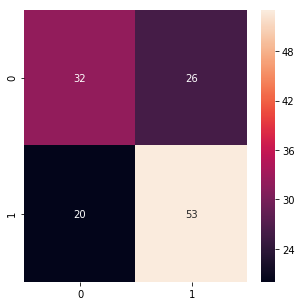

In [157]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True)

In [158]:
# calculate the fpr and tpr for all thresholds of the classification
probs = svc_linear.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

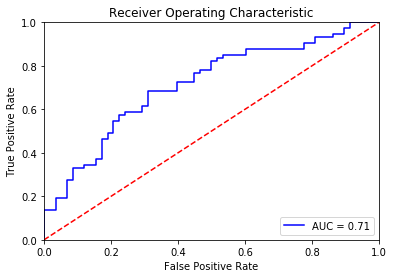

In [159]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
score = round(accuracy_score(y_test, svc_linear.predict(x_test)),2)

print('Accuracy of SVM: {} '.format(score))

Accuracy of SVM: 0.65 


### Using RBF Kernel

In [161]:
# Create the SVC model object
C = 1.0 # SVM regularization parameter

In [162]:
svc_rbf = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr', probability = True).fit(x_train, y_train)

In [163]:
predictions = svc_rbf.predict(x_test)

In [164]:
cm = confusion_matrix(y_test, predictions)

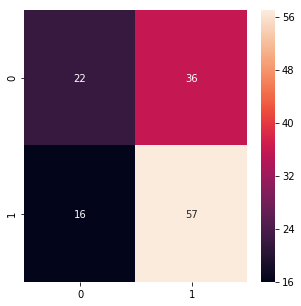

In [165]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True)

In [166]:
# calculate the fpr and tpr for all thresholds of the classification
probs = svc_rbf.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

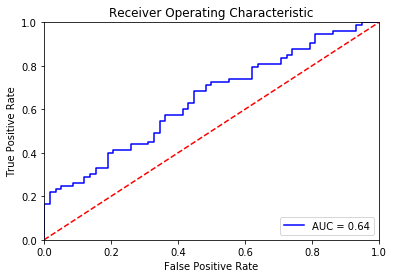

In [167]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [168]:
score = round(accuracy_score(y_test, svc_rbf.predict(x_test)),2)

print('Accuracy of SVM: {} '.format(score))

Accuracy of SVM: 0.6 


### Using polynomial Kernel

#### Default degree of the polynomial kernel function is 3

In [169]:
# Create the SVC model object
C = 1.0 # SVM regularization parameter

In [170]:
svc_poly = svm.SVC(kernel='poly', C=C, decision_function_shape='ovr', probability = True).fit(x_train, y_train)

In [171]:
predictions = svc_poly.predict(x_test)

In [172]:
cm = confusion_matrix(y_test, predictions)

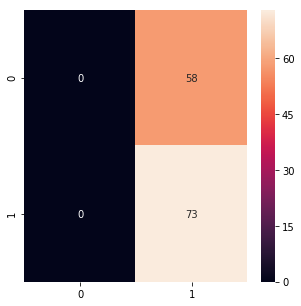

In [173]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True)

In [174]:
# calculate the fpr and tpr for all thresholds of the classification
probs = svc_poly.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

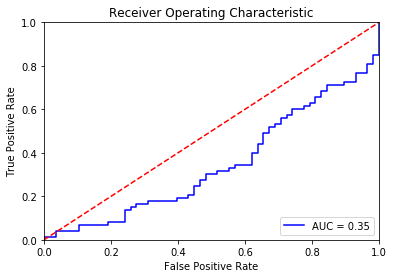

In [175]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [176]:
score = round(accuracy_score(y_test, svc_poly.predict(x_test)),2)

print('Accuracy of SVM: {} '.format(score))

Accuracy of SVM: 0.56 


#### Sci-kit Learn Code for Learning Curves

from sklearn.model_selection import learning_curve

In [53]:
# Function to plot a learning curve.
# Taken from http://scikit-learn.org/dev/_downloads/plot_learning_curve.py

def plot_learning_curve(estimator, plot_title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        null for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """    
    from sklearn.learning_curve import learning_curve
    
    plt.figure()
    plt.title(plot_title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Cost = 1 - Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes,
                                                            scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, 1 - train_scores_mean + train_scores_std,
                     1 - train_scores_mean - train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, 1 - test_scores_mean + test_scores_std,
                     1 - test_scores_mean - test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, 1 - test_scores_mean, 'o-', color="r",
             label="Test score")

    plt.legend(loc="best")
    plt.show()

In [181]:
def plot_validation_curve(train_scores, test_scores, title, xlabel, param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [98]:
def plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")
    plt.legend(loc="best")
    plt.show()

In [ ]:
def plot_validation_curve_comparison(test_scores, title, xlabel, param_range):
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, test_scores_mean, label="Test score", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, lw=lw)

### Comparing 3 different SVM Kernels

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


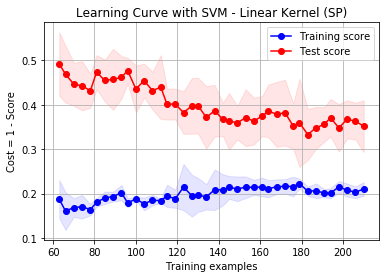

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


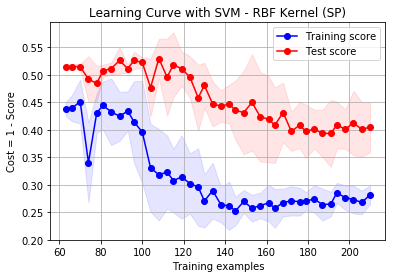

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


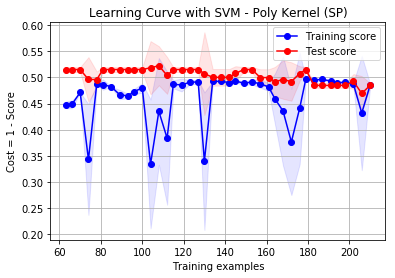

In [229]:
title1 = 'Learning Curve with SVM - Linear Kernel (SP)'
title2 = 'Learning Curve with SVM - RBF Kernel (SP)'
title3 = 'Learning Curve with SVM - Poly Kernel (SP)'

plot_learning_curve(svc_linear, title1, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 40))
plot_learning_curve(svc_rbf, title2, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 40))
plot_learning_curve(svc_poly, title3, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 40))

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


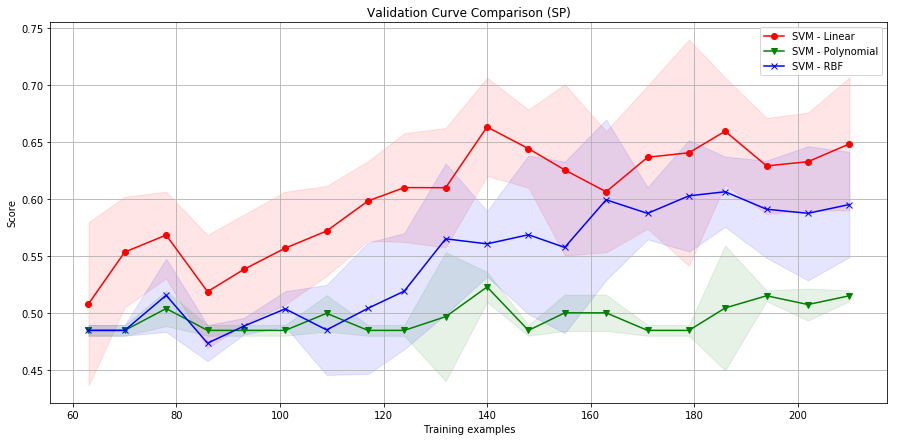

In [230]:
train_sizes = np.linspace(.3, 1.0, 20)
train_sizes_linear, train_scores_linear, test_scores_linear = learning_curve(svc_linear, x_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)
train_sizes_poly, train_scores_poly, test_scores_poly = learning_curve(svc_poly, x_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)
train_sizes_rbf, train_scores_rbf, test_scores_rbf = learning_curve(svc_rbf, x_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)

plt.figure(figsize=(15,7))
plt.title('Validation Curve Comparison (SP)')
plt.xlabel("Training examples")
plt.ylabel("Score")
test_scores_mean_linear = np.mean(test_scores_linear, axis=1)
test_scores_std_linear = np.std(test_scores_linear, axis=1)
test_scores_mean_poly = np.mean(test_scores_poly, axis=1)
test_scores_std_poly = np.std(test_scores_poly, axis=1)
test_scores_mean_rbf = np.mean(test_scores_rbf, axis=1)
test_scores_std_rbf = np.std(test_scores_rbf, axis=1)

plt.fill_between(train_sizes_linear, test_scores_mean_linear - test_scores_std_linear,
                 test_scores_mean_linear + test_scores_std_linear, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_poly, test_scores_mean_poly - test_scores_std_poly,
                 test_scores_mean_poly + test_scores_std_poly, alpha=0.1, color="g")
plt.fill_between(train_sizes_rbf, test_scores_mean_rbf - test_scores_std_rbf,
                 test_scores_mean_rbf + test_scores_std_rbf, alpha=0.1, color="b")


plt.plot(train_sizes_linear, test_scores_mean_linear, 'o-', color="r",
         label="SVM - Linear")
plt.plot(train_sizes_poly, test_scores_mean_poly, 'v-', color="g",
         label="SVM - Polynomial")
plt.plot(train_sizes_rbf, test_scores_mean_rbf, 'x-', color="b",
         label="SVM - RBF")
plt.grid()
plt.legend(loc="best")

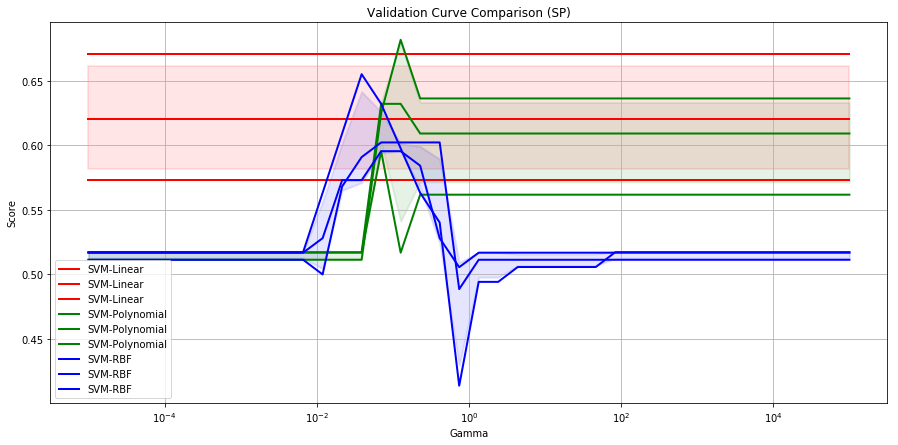

In [232]:
param_range = np.logspace(-5,5,40)
train_scores_linear, test_scores_linear = validation_curve(svc_linear, x_train, y_train, n_jobs=1, param_name='gamma', param_range=param_range)
train_scores_poly, test_scores_poly = validation_curve(svc_poly, x_train, y_train, n_jobs=1, param_name='gamma', param_range=param_range)
train_scores_rbf, test_scores_rbf = validation_curve(svc_rbf, x_train, y_train, n_jobs=1, param_name='gamma', param_range=param_range)

plt.figure(figsize=(15,7))
plt.title('Validation Curve Comparison (SP)')
plt.xlabel("Gamma")
plt.ylabel("Score")
lw=2
test_scores_mean_linear = np.mean(test_scores_linear, axis=1)
test_scores_std_linear = np.std(test_scores_linear, axis=1)
test_scores_mean_poly = np.mean(test_scores_poly, axis=1)
test_scores_std_poly = np.std(test_scores_poly, axis=1)
test_scores_mean_rbf = np.mean(test_scores_rbf, axis=1)
test_scores_std_rbf = np.std(test_scores_rbf, axis=1)

plt.semilogx(param_range, test_scores_linear, label="SVM-Linear", lw=lw, color="r")
plt.fill_between(param_range, test_scores_mean_linear - test_scores_std_linear,
                 test_scores_mean_linear + test_scores_std_linear, alpha=0.1,
                 color="r", lw=lw)

plt.semilogx(param_range, test_scores_poly, label="SVM-Polynomial", lw=lw, color="g")
plt.fill_between(param_range, test_scores_mean_poly - test_scores_std_poly,
                 test_scores_mean_poly + test_scores_std_poly, alpha=0.1, color="g", lw=lw)

plt.semilogx(param_range, test_scores_rbf, label="SVM-RBF", lw=lw, color="b")
plt.fill_between(param_range, test_scores_mean_rbf - test_scores_std_rbf,
                 test_scores_mean_rbf + test_scores_std_rbf, alpha=0.1, color="b", lw=lw)

plt.grid()
plt.legend(loc="best")

### Using Decision Tree

In [204]:
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=777).fit(x_train, y_train)

In [205]:
predictions = decision_tree.predict(x_test)

In [206]:
cm = confusion_matrix(y_test, predictions)

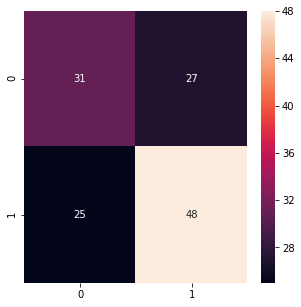

In [207]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True)

In [209]:
# calculate the fpr and tpr for all thresholds of the classification
probs = decision_tree.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

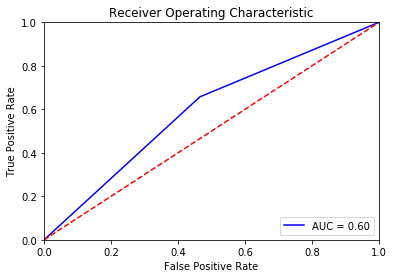

In [210]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [212]:
score = round(accuracy_score(y_test, decision_tree.predict(x_test)),2)

print('Accuracy of Decision Tree: {} '.format(score))

Accuracy of Decision Tree: 0.6 


### Using Random Forest

In [213]:
random_forest = RandomForestClassifier(criterion='gini', random_state=777).fit(x_train, y_train)

In [214]:
predictions = random_forest.predict(x_test)

In [215]:
cm = confusion_matrix(y_test, predictions)

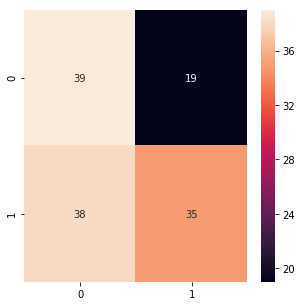

In [216]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True)

In [217]:
# calculate the fpr and tpr for all thresholds of the classification
probs = random_forest.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

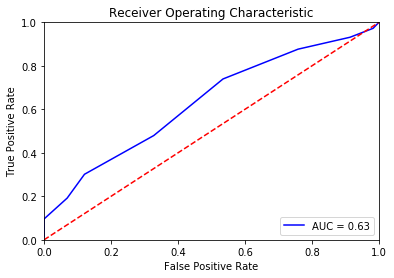

In [218]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [219]:
score = round(accuracy_score(y_test, random_forest.predict(x_test)),2)

print('Accuracy of Random Forest: {} '.format(score))

Accuracy of Random Forest: 0.56 


### Using Gradient Boosted Classifier

In [220]:
gradient_boosted_classifier = GradientBoostingClassifier(learning_rate=1, random_state=777).fit(x_train, y_train)

In [221]:
predictions = gradient_boosted_classifier.predict(x_test)

In [222]:
cm = confusion_matrix(y_test, predictions)

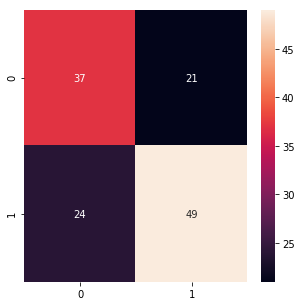

In [223]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True)

In [225]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gradient_boosted_classifier.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

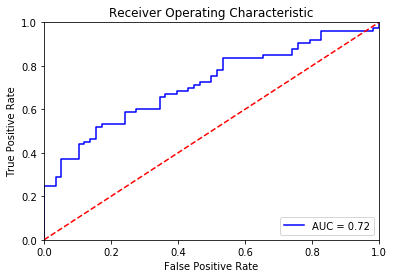

In [226]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [227]:
score = round(accuracy_score(y_test, gradient_boosted_classifier.predict(x_test)),2)

print('Accuracy of Gradient Boosted Classifier: {} '.format(score))

Accuracy of Gradient Boosted Classifier: 0.66 


### Hyper-parameter tuning for SVM

In [137]:
# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [0.01, 0.1, 1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
             {'kernel': ['poly'],
             'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
             'C': [0.01, 0.1, 1, 10, 100, 1000]}]

print("# Tuning hyper-parameters for SVM")
print()

model1 = svm.SVC(decision_function_shape='over', probability=True)
clf = GridSearchCV(estimator=model1, param_grid=parameters, cv=10)
clf.fit(x_train, y_train)

print("Best parameters set found on Cross-Validation set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters for SVM

Best parameters set found on Cross-Validation set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on training set:

0.515 (+/-0.015) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.01, 'gamma': 0.2, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.01, 'gamma': 0.5, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.1, 'gamma': 0.2, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
0.515 (+/-0.015) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.515 (+/-0.

##### Plotting Learning Curves

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


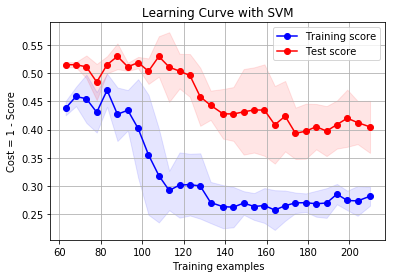

In [64]:
clf_learning = svm.SVC(decision_function_shape='ovr',random_state=777)

title = 'Learning Curve with SVM'
plot_learning_curve(clf_learning, title, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 30))

##### Plotting Validation Curves for Gamma Values

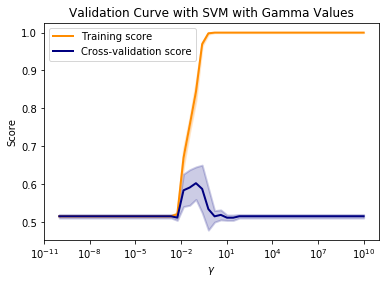

In [85]:
clf_valid = svm.SVC(decision_function_shape='ovr', random_state=777)

param_range = np.logspace(-10, 10, 50)
train_scores, test_scores = validation_curve(
    clf_valid, x_train, y_train, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

title = "Validation Curve with SVM with Gamma Values"
xlabel = "$\gamma$"
plot_validation_curve(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for C Values

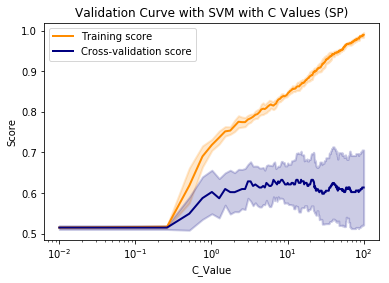

In [234]:
clf_valid = svm.SVC(decision_function_shape='ovr', random_state=777)

param_range = np.linspace(0.01, 100, 400)
train_scores, test_scores = validation_curve(
    clf_valid, x_train, y_train, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

title = "Validation Curve with SVM with C Values (SP)"
xlabel = "C_Value"
plot_validation_curve(train_scores, test_scores, title, xlabel, param_range)

## Decision Tree Classifier (with Feature Scaling)

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Set the parameters by cross-validation
parameters = {'min_samples_split' : range(10,200,20),'max_depth': range(1,10,2), 'max_features': range(1,43,3)}

print("# Tuning hyper-parameters for Decision Tree")
print()

clf_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
clf_tree.fit(x_train, y_train)

print("Best parameters set found on Cross-Validation set:")
print()
print(clf_tree.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf_tree.cv_results_['mean_test_score']
stds = clf_tree.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_tree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters for Decision Tree

Best parameters set found on Cross-Validation set:

{'max_depth': 9, 'max_features': 7, 'min_samples_split': 70}

Grid scores on training set:

0.538 (+/-0.119) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
0.511 (+/-0.098) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
0.481 (+/-0.178) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 50}
0.492 (+/-0.179) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 70}
0.542 (+/-0.167) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 90}
0.545 (+/-0.126) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 110}
0.542 (+/-0.118) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 130}
0.545 (+/-0.166) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 150}
0.489 (+/-0.145) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 170}
0.538 (+/-0.157) for {'max_depth': 1, 'max_features': 1, 'min_samples

0.557 (+/-0.182) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 30}
0.595 (+/-0.268) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 50}
0.568 (+/-0.209) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 70}
0.583 (+/-0.167) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 90}
0.553 (+/-0.205) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 110}
0.553 (+/-0.107) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 130}
0.561 (+/-0.167) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 150}
0.504 (+/-0.187) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 170}
0.564 (+/-0.166) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 190}
0.553 (+/-0.213) for {'max_depth': 7, 'max_features': 13, 'min_samples_split': 10}
0.595 (+/-0.184) for {'max_depth': 7, 'max_features': 13, 'min_samples_split': 30}
0.583 (+/-0.171) for {'max_depth': 7, 'max_features': 13, 'min_samples_split': 50}

##### Plotting Learning Curves

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


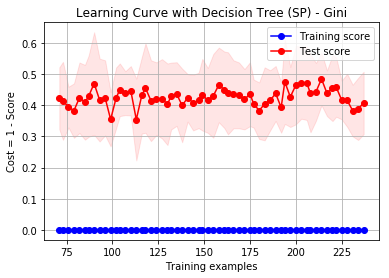

In [239]:
clf_tree_learning = DecisionTreeClassifier(criterion='gini', random_state=777)

title = 'Learning Curve with Decision Tree (SP) - Gini'
plot_learning_curve(clf_tree_learning, title, x_train, y_train, cv = 10, train_sizes=np.linspace(.3, 1.0, 60))

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


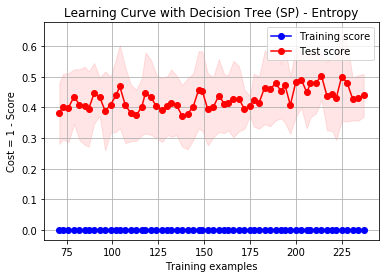

In [240]:
clf_tree_learning = DecisionTreeClassifier(criterion='entropy', random_state=777)

title = 'Learning Curve with Decision Tree (SP) - Entropy'
plot_learning_curve(clf_tree_learning, title, x_train, y_train, cv = 10, train_sizes=np.linspace(.3, 1.0, 60))

##### Plotting Validation Curves for Maximum Features

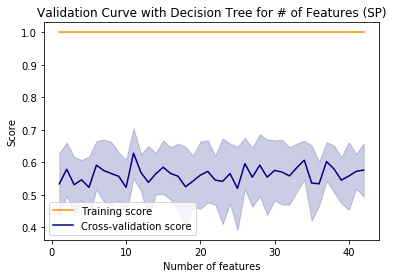

In [241]:
clf_tree_valid = DecisionTreeClassifier(criterion='gini',random_state=777)

param_range = [i for i in range(1,x_train.shape[1])]
train_scores, test_scores = validation_curve(
    clf_tree_valid, x_train, y_train, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Decision Tree for # of Features (SP)"
xlabel = "Number of features"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Minimum Samples Split

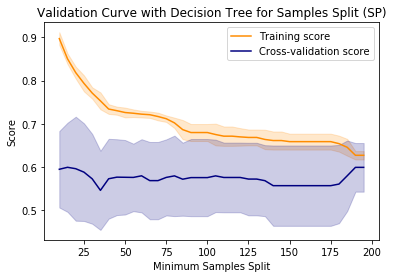

In [242]:
clf_tree_valid = DecisionTreeClassifier(criterion='gini',random_state=777)

param_range = list(range(10,200,5))
train_scores, test_scores = validation_curve(
    clf_tree_valid, x_train, y_train, param_name="min_samples_split", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Decision Tree for Samples Split (SP)"
xlabel = "Minimum Samples Split"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Maximum Depth

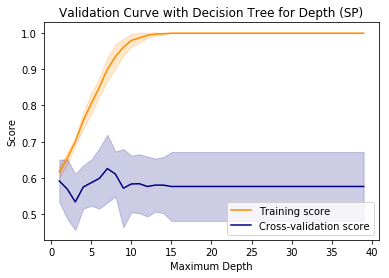

In [243]:
clf_tree_valid = DecisionTreeClassifier(criterion='gini',random_state=777)

param_range = list(range(1,40,1))
train_scores, test_scores = validation_curve(
    clf_tree_valid, x_train, y_train, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Decision Tree for Depth (SP)"
xlabel = "Maximum Depth"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Maximum Leaf Nodes

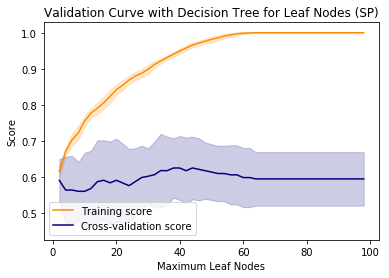

In [244]:
clf_tree_valid = DecisionTreeClassifier(criterion='gini',random_state=777)

param_range = list(range(2,100,2))
train_scores, test_scores = validation_curve(
    clf_tree_valid, x_train, y_train, param_name="max_leaf_nodes", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Decision Tree for Leaf Nodes (SP)"
xlabel = "Maximum Leaf Nodes"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Minimum Samples Leaf

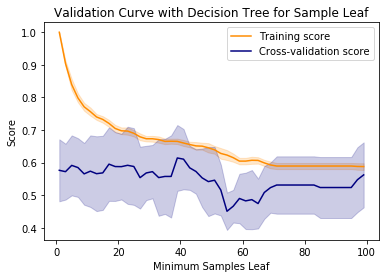

In [148]:
clf_tree_valid = DecisionTreeClassifier(criterion='gini',random_state=777)

param_range = list(range(1,100,2))
train_scores, test_scores = validation_curve(
    clf_tree_valid, x_train, y_train, param_name="min_samples_leaf", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Decision Tree for Sample Leaf"
xlabel = "Minimum Samples Leaf"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

## Random Tree Classifier (with Feature Scaling)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
# Set the parameters by cross-validation
parameters = {'min_samples_split' : range(10,200,20),'max_depth': range(1,10,2), 'max_features': range(1,43,3)}

print("# Tuning hyper-parameters for Random Forest")
print()

clf_rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10)
clf_rf.fit(x_train, y_train)

print("Best parameters set found on Cross-Validation set:")
print()
print(clf_rf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf_rf.cv_results_['mean_test_score']
stds = clf_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters for Random Forest

Best parameters set found on Cross-Validation set:

{'max_depth': 3, 'max_features': 1, 'min_samples_split': 70}

Grid scores on training set:

0.530 (+/-0.196) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
0.527 (+/-0.201) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
0.568 (+/-0.215) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 50}
0.606 (+/-0.165) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 70}
0.557 (+/-0.135) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 90}
0.542 (+/-0.245) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 110}
0.580 (+/-0.202) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 130}
0.553 (+/-0.105) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 150}
0.508 (+/-0.030) for {'max_depth': 1, 'max_features': 1, 'min_samples_split': 170}
0.515 (+/-0.015) for {'max_depth': 1, 'max_features': 1, 'min_samples

0.591 (+/-0.206) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 10}
0.610 (+/-0.247) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 30}
0.591 (+/-0.203) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 50}
0.602 (+/-0.280) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 70}
0.576 (+/-0.197) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 90}
0.598 (+/-0.163) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 110}
0.538 (+/-0.277) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 130}
0.583 (+/-0.171) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 150}
0.515 (+/-0.015) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 170}
0.515 (+/-0.015) for {'max_depth': 7, 'max_features': 7, 'min_samples_split': 190}
0.655 (+/-0.239) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 10}
0.655 (+/-0.154) for {'max_depth': 7, 'max_features': 10, 'min_samples_split': 30}
0.621 (+/

##### Plotting Learning Curves

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


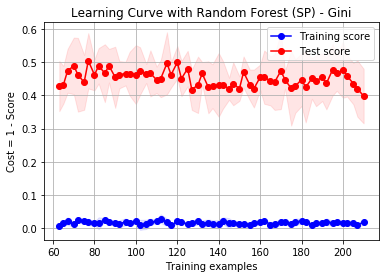

In [246]:
clf_rf_learning = RandomForestClassifier(criterion='gini',random_state=777)

title = 'Learning Curve with Random Forest (SP) - Gini'
plot_learning_curve(clf_rf_learning, title, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 60))

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


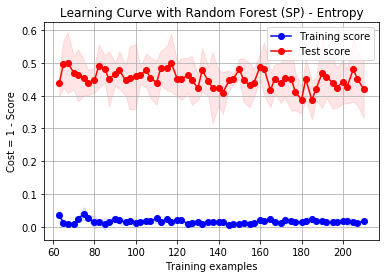

In [247]:
clf_rf_learning = RandomForestClassifier(criterion='entropy',random_state=777)

title = 'Learning Curve with Random Forest (SP) - Entropy'
plot_learning_curve(clf_rf_learning, title, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 60))

##### Plotting Validation Curves for # of Features

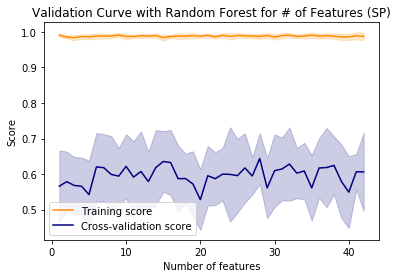

In [248]:
clf_rf_valid = RandomForestClassifier(criterion='gini',random_state=777)

param_range = [i for i in range(1,x_train.shape[1])]
train_scores, test_scores = validation_curve(
    clf_rf_valid, x_train, y_train, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Random Forest for # of Features (SP)"
xlabel = "Number of features"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Minimum Samples Split

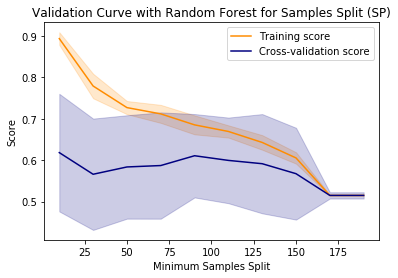

In [249]:
clf_rf_valid = RandomForestClassifier(criterion='gini',random_state=777)

param_range = list(range(10,200,20))
train_scores, test_scores = validation_curve(
    clf_rf_valid, x_train, y_train, param_name="min_samples_split", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Random Forest for Samples Split (SP)"
xlabel = "Minimum Samples Split"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Maximum Depth

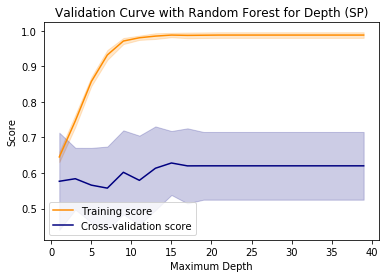

In [250]:
clf_rf_valid = RandomForestClassifier(criterion='gini',random_state=777)

param_range = list(range(1,40,2))
train_scores, test_scores = validation_curve(
    clf_rf_valid, x_train, y_train, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Random Forest for Depth (SP)"
xlabel = "Maximum Depth"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

### Gradient Boosting Classifier (with Feature Scaling)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Set the parameters by cross-validation
parameters = {'min_samples_split' : range(10,200,20),'max_depth': range(1,10,2), 'max_features': range(1,43,3), 'learning_rate': range(1, 10, 100)}

print("# Tuning hyper-parameters for Gradient Boosting Classifier")
print()

clf_gbc = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10)
clf_gbc.fit(x_train, y_train)

print("Best parameters set found on Cross-Validation set:")
print()
print(clf_gbc.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf_gbc.cv_results_['mean_test_score']
stds = clf_gbc.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_gbc.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters for Gradient Boosting Classifier

Best parameters set found on Cross-Validation set:

{'learning_rate': 1, 'max_depth': 1, 'max_features': 7, 'min_samples_split': 70}

Grid scores on training set:

0.614 (+/-0.227) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 10}
0.659 (+/-0.211) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 30}
0.652 (+/-0.213) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 50}
0.633 (+/-0.213) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 70}
0.576 (+/-0.221) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 90}
0.636 (+/-0.155) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 110}
0.591 (+/-0.169) for {'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'min_samples_split': 130}
0.614 (+/-0.207) for {'learning_rate': 1, 'max_depth': 1, 'm

0.648 (+/-0.199) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 37, 'min_samples_split': 150}
0.640 (+/-0.186) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 37, 'min_samples_split': 170}
0.655 (+/-0.213) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 37, 'min_samples_split': 190}
0.621 (+/-0.219) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 40, 'min_samples_split': 10}
0.595 (+/-0.304) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 40, 'min_samples_split': 30}
0.629 (+/-0.198) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 40, 'min_samples_split': 50}
0.648 (+/-0.215) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 40, 'min_samples_split': 70}
0.621 (+/-0.264) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 40, 'min_samples_split': 90}
0.663 (+/-0.241) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 40, 'min_samples_split': 110}
0.625 (+/-0.164) for {'learning_rate': 1, 'max_depth': 5, 'max_featur

##### Plotting Learning Curves

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:209: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


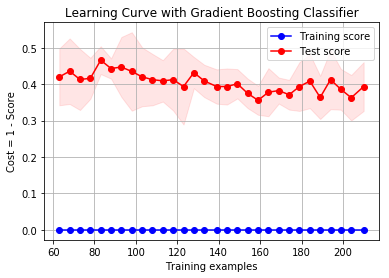

In [81]:
clf_gbc_learning = GradientBoostingClassifier(learning_rate=1, random_state=777)

title = 'Learning Curve with Gradient Boosting Classifier'
plot_learning_curve(clf_gbc_learning, title, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.3, 1.0, 30))

##### Plotting Validation Curves

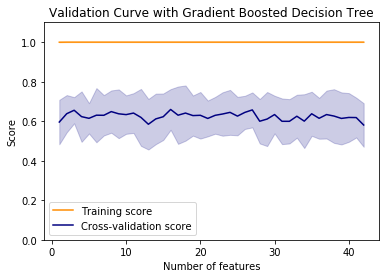

In [82]:
clf_gbc_valid = GradientBoostingClassifier(learning_rate=1, random_state=777)

param_range = [i for i in range(1,x_train.shape[1])]
train_scores, test_scores = validation_curve(
    clf_gbc_valid, x_train, y_train, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Gradient Boosted Decision Tree"
xlabel = "Number of features"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Minimum Samples Split

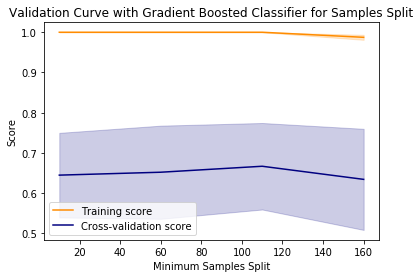

In [108]:
clf_gbc_valid = GradientBoostingClassifier(learning_rate=1,random_state=777)

param_range = list(range(10,200,50))
train_scores, test_scores = validation_curve(
    clf_gbc_valid, x_train, y_train, param_name="min_samples_split", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Gradient Boosted Classifier for Samples Split"
xlabel = "Minimum Samples Split"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Maximum Depth

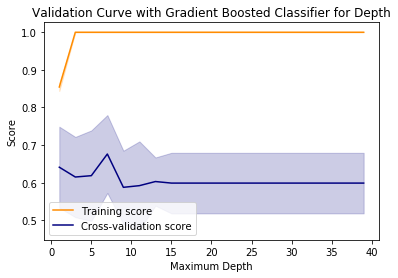

In [109]:
clf_gbc_valid = GradientBoostingClassifier(learning_rate=1,random_state=777)

param_range = list(range(1,40,2))
train_scores, test_scores = validation_curve(
    clf_gbc_valid, x_train, y_train, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Gradient Boosted Classifier for Depth"
xlabel = "Maximum Depth"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for Learning Rates

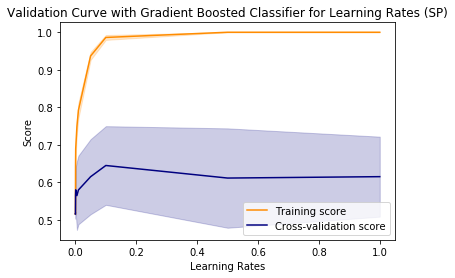

In [256]:
clf_gbc_valid = GradientBoostingClassifier(random_state=777)

param_range = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
train_scores, test_scores = validation_curve(
    clf_gbc_valid, x_train, y_train, param_name="learning_rate", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Gradient Boosted Classifier for Learning Rates (SP)"
xlabel = "Learning Rates"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

##### Plotting Validation Curves for N estimators

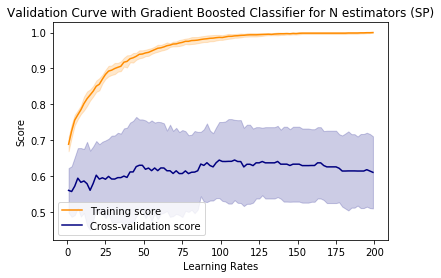

In [258]:
clf_gbc_valid = GradientBoostingClassifier(random_state=777)

param_range = list(range(1,200,2))
train_scores, test_scores = validation_curve(
    clf_gbc_valid, x_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Gradient Boosted Classifier for N estimators (SP)"
xlabel = "Learning Rates"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

#### Print Accuracy Rates (for Test Set)

In [112]:
print('Accuracy for SVM: {}'.format(clf.score(x_test, y_test)))
print('Accuracy for Decision Tree: {}'.format(clf_tree.score(x_test, y_test)))
print('Accuracy for Random Forest: {}'.format(clf_rf.score(x_test, y_test)))
print('Accuracy for Gradient Boosted Classifier: {}'.format(clf_gbc.score(x_test, y_test)))

Accuracy for SVM: 0.6564885496183206
Accuracy for Decision Tree: 0.6412213740458015
Accuracy for Random Forest: 0.6946564885496184
Accuracy for Gradient Boosted Classifier: 0.6412213740458015


#### Print Confusion Matrix for Classifiers

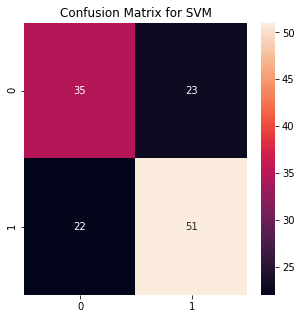

Sensitivity for SVM:  0.603
Specificity for SVM:  0.699
F Score for SVM:  0.694


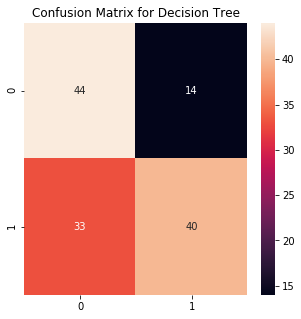

Sensitivity for Decision Tree:  0.759
Specificity for Decision Tree:  0.548
F Score for Decision Tree:  0.63


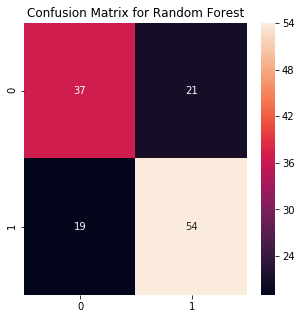

Sensitivity for Random Forest:  0.638
Specificity for Random Forest:  0.74
F Score for Random Forest:  0.73


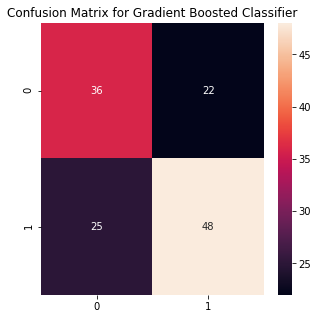

Sensitivity for Gradient Boosted Classifier:  0.621
Specificity for Gradient Boosted Classifier:  0.658
F Score for Gradient Boosted Classifier:  0.671


In [130]:
cm_svm = confusion_matrix(y_test, clf.predict(x_test))
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for SVM')
sns.heatmap(cm_svm, annot=True)
plt.show()
sensitivity_svm = round(cm_svm[0,0]/(cm_svm[0,0]+cm_svm[0,1]),3)
print('Sensitivity for SVM: ', sensitivity_svm )
specificity_svm = round(cm_svm[1,1]/(cm_svm[1,0]+cm_svm[1,1]),3)
print('Specificity for SVM: ', specificity_svm)
f_score_svm = round(f1_score(y_test, clf.predict(x_test)),3)
print('F Score for SVM: ', f_score_svm)

cm_tree = confusion_matrix(y_test, clf_tree.predict(x_test))
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(cm_tree, annot=True)
plt.show()
sensitivity_tree = round(cm_tree[0,0]/(cm_tree[0,0]+cm_tree[0,1]),3)
print('Sensitivity for Decision Tree: ', sensitivity_tree )
specificity_tree = round(cm_tree[1,1]/(cm_tree[1,0]+cm_tree[1,1]),3)
print('Specificity for Decision Tree: ', specificity_tree)
f_score_tree = round(f1_score(y_test, clf_tree.predict(x_test)),3)
print('F Score for Decision Tree: ', f_score_tree)

cm_rf = confusion_matrix(y_test, clf_rf.predict(x_test))
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for Random Forest')
sns.heatmap(cm_rf, annot=True)
plt.show()
sensitivity_rf = round(cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1]),3)
print('Sensitivity for Random Forest: ', sensitivity_rf )
specificity_rf = round(cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]),3)
print('Specificity for Random Forest: ', specificity_rf)
f_score_rf = round(f1_score(y_test, clf_rf.predict(x_test)),3)
print('F Score for Random Forest: ', f_score_rf)

cm_gbc = confusion_matrix(y_test, clf_gbc.predict(x_test))
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for Gradient Boosted Classifier')
sns.heatmap(cm_gbc, annot=True)
plt.show()
sensitivity_gbc = round(cm_gbc[0,0]/(cm_gbc[0,0]+cm_gbc[0,1]),3)
print('Sensitivity for Gradient Boosted Classifier: ', sensitivity_gbc )
specificity_gbc = round(cm_gbc[1,1]/(cm_gbc[1,0]+cm_gbc[1,1]),3)
print('Specificity for Gradient Boosted Classifier: ', specificity_gbc)
f_score_gbc = round(f1_score(y_test, clf_gbc.predict(x_test)),3)
print('F Score for Gradient Boosted Classifier: ', f_score_gbc)

#### Print ROC Curve for Classifiers

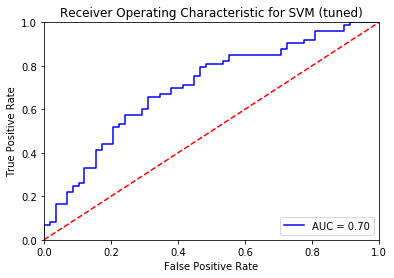

In [142]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for SVM (tuned)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

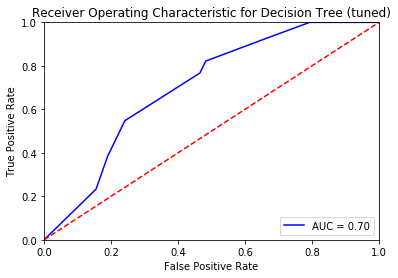

In [143]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_tree.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for Decision Tree (tuned)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

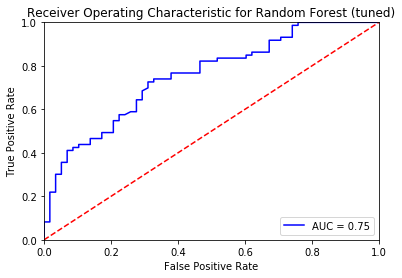

In [144]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_rf.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for Random Forest (tuned)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

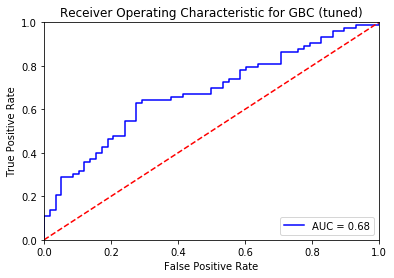

In [145]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_gbc.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for GBC (tuned)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/Wei

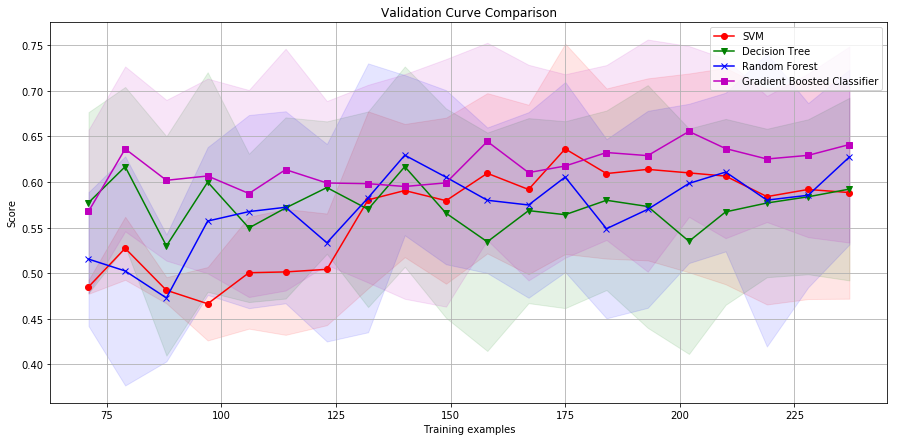

In [202]:
train_sizes = np.linspace(.3, 1.0, 20)
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(clf_valid, x_train, y_train, cv=10, n_jobs=1, train_sizes=train_sizes)
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(clf_tree_valid, x_train, y_train, cv=10, n_jobs=1, train_sizes=train_sizes)
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(clf_rf_valid, x_train, y_train, cv=10, n_jobs=1, train_sizes=train_sizes)
train_sizes_gbc, train_scores_gbc, test_scores_gbc = learning_curve(clf_gbc_valid, x_train, y_train, cv=10, n_jobs=1, train_sizes=train_sizes)

plt.figure(figsize=(15,7))
plt.title('Validation Curve Comparison')
plt.xlabel("Training examples")
plt.ylabel("Score")
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)
test_scores_std_svm = np.std(test_scores_svm, axis=1)
test_scores_mean_tree = np.mean(test_scores_tree, axis=1)
test_scores_std_tree = np.std(test_scores_tree, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)
test_scores_mean_gbc = np.mean(test_scores_gbc, axis=1)
test_scores_std_gbc = np.std(test_scores_gbc, axis=1)

plt.fill_between(train_sizes_svm, test_scores_mean_svm - test_scores_std_svm,
                 test_scores_mean_svm + test_scores_std_svm, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes_tree, test_scores_mean_tree - test_scores_std_tree,
                 test_scores_mean_tree + test_scores_std_tree, alpha=0.1, color="g")
plt.fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf,
                 test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="b")
plt.fill_between(train_sizes_gbc, test_scores_mean_gbc - test_scores_std_gbc,
                 test_scores_mean_gbc + test_scores_std_gbc, alpha=0.1, color="m")


plt.plot(train_sizes_svm, test_scores_mean_svm, 'o-', color="r",
         label="SVM")
plt.plot(train_sizes_tree, test_scores_mean_tree, 'v-', color="g",
         label="Decision Tree")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'x-', color="b",
         label="Random Forest")
plt.plot(train_sizes_gbc, test_scores_mean_gbc, 's-', color="m",
         label="Gradient Boosted Classifier")

plt.grid()
plt.legend(loc="best")